In [1]:
import numpy as np
from sklearn.datasets import make_blobs # for creation of toy dataset
import matplotlib.pyplot as plt

### Squared hinge loss

Given an instance x of the positive class ($y = 1$), the loss is 0 if the output s of the decision function ($s = w^T x + b$) is greater than or equal to 1. Given an instance of the negative class (i.e.,
$y = –1$), the loss is 0 if $s ≤ –1$. Hence squared hinge loss is defined as

$h = max(0, 1 - y(w^T \cdot x + b))^2$

The maximum function can be easily expessed (for computational reasons) as

$max(a, b) = \frac{a + b + |a - b|}{2}$, which in our case reads

$h = \bigg ( \frac{1 - y(w^T \cdot x + b) + |1 - y(w^T \cdot x + b)|}{2} \bigg )^2$.

The derivative of squared hinge loss, necessary to compute gradients is the following

* $\frac{\partial h}{\partial w_j} = -2 y(1 - y(w^T \cdot x + b))x_j$ $\quad$ if $\quad $ $1 - y(w^T \cdot x + b) > 0$ and otherwise it is equal to 0

* $\frac{\partial h}{\partial b} = -2 y(1 - y(w^T \cdot x + b))$ $\quad$ if $\quad$ $1 - y(w^T \cdot x + b) > 0$ and otherwise it is equal to 0.

In [33]:
def squared_hinge_loss(X, y, W, b):
  '''
  Calculates squared hinge loss for whole batch of data points.
  Minimizing this function is the main objective of linear vector support algorithm.

  Args:
    X (n by m array): set of training data (n - number of data points, m - dimensionality of data)
    y (n x 1 array): targets vector, contains labels (+-1) for each data point
    W (1 x m array): vector of weights (m = dimensionality of data)
    b (float): bias term

  Returns:
    mean square of hinge loss, defined as max(0, 1 - y(WX + b))**2,
    where y is = 1 for positive instance and y = -1 for negative instance
  '''
  n = X.shape[0] # number of data points
  # If y does not have appropriate shape, reshape it
  if y.ndim == 1:
    y = np.expand_dims(y, axis = 1)
  # Calculate squared hinge loss for all points
  squared_hinge = np.where(1 - y*(np.dot(X, W.T) + b) <= 0, 0, (1 - y*(np.dot(X, W.T) + b))**2)
  # Calculate mean squared hinge loss for all data points
  return (1/n) * np.sum(squared_hinge.flatten())

In [28]:
# Test squared_hinge_loss
X = np.array([[1., 1.],
              [-1., -1.],
              [2.0, -1.5]])
y = np.array([[1],
              [1],
              [1]])
y2 = np.array([1,1,1])
b = 0.5
W = np.array([[1., 1.]])
squared_hinge_loss(X, y, W, b) # should return 2.083
# # y*(1 - y*(np.dot(X, W.T) + b))*X
# np.where(1 - y*(np.dot(X, W.T) + b) <= 0, 0, (1 - y*(np.dot(X, W.T) + b))**2)

2.083333333333333

In [34]:
def squared_hinge_loss_derivative(X, y, W, b):
  '''
  Calculates the gradient of squared hinge loss for whole batch of data points.

  Args:
    X (n by m array): set of training data (n - number of data points, m - dimensionality of data)
    y (n x 1 array): targets vector, contains labels (+-1) for each data point
    W (1 x m array): vector of weights (m = dimensionality of data)
    b (float): bias term

  Returns:
    mean gradient vector of squared hinge loss, calculated as above
  '''
  n = X.shape[0] # number of data points
  # If y does not have appropriate shape, reshape it
  if y.ndim == 1:
    y = np.expand_dims(y, axis = 1)
  # Calculate hinge
  hinge = 1 - y*(np.dot(X, W.T) + b)
  # Calculate derivative with respect to weights
  deriv_W = -2*y*(1 - y*(np.dot(X, W.T) + b))*X
  # Calculate derivative with respect to bias
  deriv_b = -2*y*(1 - y*(np.dot(X, W.T) + b))
  # If hinge <= 0 return 0 else return derivative
  derivatives_W = np.where(hinge <= 0, 0, deriv_W)
  derivatives_b = np.where(hinge <= 0, 0, deriv_b)
  # Calculate mean gradient vector (sum results along rows and divide by the number of points)
  grad_W = (1/n) * np.sum(derivatives_W, axis = 0)
  grad_b = (1/n) * np.sum(derivatives_b, axis = 0)
  return grad_W, grad_b

In [35]:
def update_weights_and_bias(X, y, W, b, learning_rate):
  '''
  Updates weights and bias with given learning rate

  Args:
    X (n by m array): set of training data (n - number of data points, m - dimensionality of data)
    y (n x 1 array): targets vector, contains labels (+-1) for each data point
    W (1 x m array): vector of weights (m = dimensionality of data)
    b (float): bias term
    learning_rate (float): gradient descent parameter

  Returns:
    Updated W and b
  '''
  # Calculate gradients with respect to weight and bias
  grad_W, grad_b = squared_hinge_loss_derivative(X, y, W, b)
  # Update rule for gradient descent
  W = W - learning_rate*grad_W
  b = b - learning_rate*grad_b

  return W, b

In [36]:
def linear_SVM(X, y, learning_rate, epochs):
  '''
  Defines main loop of SVM algorithm.

  Args:
    X (n by m array): set of training data (n - number of data points, m - dimensionality of data)
    y (n x 1 array): targets vector, contains labels (+-1) for each data point
    learning_rate (float): gradient descent parameter
    epochs (int): number of iterations of gradient descent

  Returns:
    Learned parameters W and b obtained by minimalization of squared hinge loss
  '''
  # Initialize W and b
  W = np.random.normal(size = (1, X.shape[1]))
  b = np.random.normal(size = 1)

  # Main loop
  for epoch in range(epochs):
    # Update weights and bias
    W, b = update_weights_and_bias(X, y, W, b, learning_rate)
    # Print squared hinge loss once every 10 epochs to see how learning is going
    if epochs % 10 == 0:
      print(f"Epoch: {epoch}, loss: {squared_hinge_loss(X, y, W, b)}")

  # Return learned parameters
  return W, b

### Create and plot toy dataset

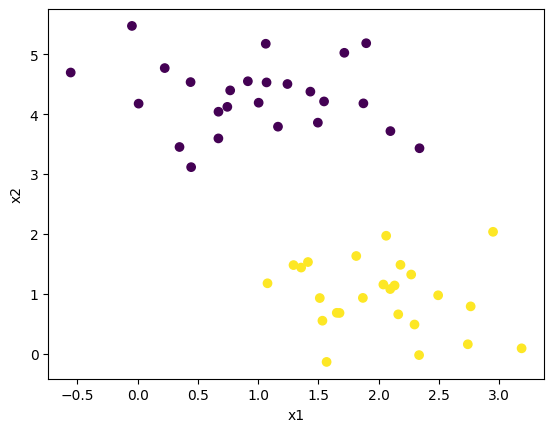

In [46]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Change label 0 to -1 in y
y[y == 0] = -1
y[:10]

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### Training model

In [47]:
# Define hyperparameters
learning_rate = 0.01
epochs = 300

# Run training loop
W, b = linear_SVM(X, y, learning_rate, epochs)

Epoch: 0, loss: 1.5412925868349086
Epoch: 1, loss: 1.1015714785032473
Epoch: 2, loss: 0.8098170092156523
Epoch: 3, loss: 0.6135133048564965
Epoch: 4, loss: 0.4783724412096529
Epoch: 5, loss: 0.38327274626448393
Epoch: 6, loss: 0.31470587761089874
Epoch: 7, loss: 0.26497794523842944
Epoch: 8, loss: 0.2279838391562774
Epoch: 9, loss: 0.20002892032177225
Epoch: 10, loss: 0.17822385433178262
Epoch: 11, loss: 0.16090960430212609
Epoch: 12, loss: 0.14679467119082415
Epoch: 13, loss: 0.1346581660104062
Epoch: 14, loss: 0.12406088181964574
Epoch: 15, loss: 0.11477084827379154
Epoch: 16, loss: 0.10662573209785471
Epoch: 17, loss: 0.0994806381676157
Epoch: 18, loss: 0.09315028828145192
Epoch: 19, loss: 0.08745149117545908
Epoch: 20, loss: 0.08230247586737452
Epoch: 21, loss: 0.07764986748074684
Epoch: 22, loss: 0.07344547345536415
Epoch: 23, loss: 0.06964578038095658
Epoch: 24, loss: 0.06621149968479255
Epoch: 25, loss: 0.06310617220357403
Epoch: 26, loss: 0.06027449750427058
Epoch: 27, loss: 0.

### Plot separation line and margin

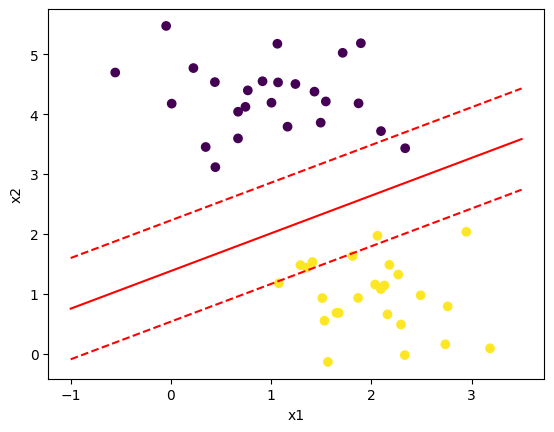

In [48]:
# Create grid of points
x = np.linspace(-1, 3.5, 100)

# Create separation line
y1 = -b[0]/W[0,1] - (W[0,0]/W[0,1])*x

# Create margins (WX + b = +-1)
y2 = 1/W[0,1] -b[0]/W[0,1] - (W[0,0]/W[0,1])*x
y3 = -1/W[0,1] -b[0]/W[0,1] - (W[0,0]/W[0,1])*x

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')

# Plot separation line and margin
plt.plot(x, y1, color = 'red')
plt.plot(x, y2, color = 'red', linestyle = 'dashed')
plt.plot(x, y3, color = 'red', linestyle = 'dashed')

plt.show()
